## Flood Fill

https://leetcode.com/problems/flood-fill/

An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.

You are also given three integers sr, sc, and newColor. You should perform a flood fill on the image starting from the pixel image[sr][sc].

To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with newColor.

Return the modified image after performing the flood fill.

 

Example 1:
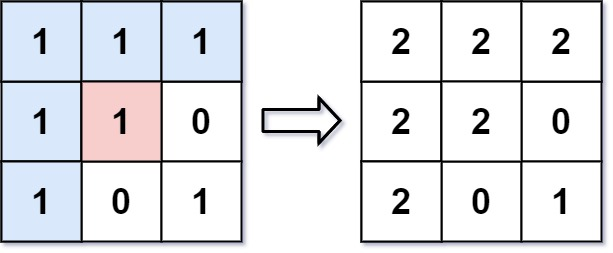

Input: image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, newColor = 2
Output: [[2,2,2],[2,2,0],[2,0,1]]
Explanation: From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color.
Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.

Example 2:

Input: image = [[0,0,0],[0,0,0]], sr = 0, sc = 0, newColor = 2
Output: [[2,2,2],[2,2,2]]

In [1]:
class Solution(object):
    def floodFill(self, image, sr, sc, newColor):
        """
        :type image: List[List[int]]
        :type sr: int
        :type sc: int
        :type newColor: int
        :rtype: List[List[int]]
        """
        m,n,curColor=len(image),len(image[0]),image[sr][sc]
        visited=[]
        def bfs(r,c):
            queue=[]
            queue.append((r,c))
            while queue:
                r,c=queue.pop()
                if (r,c) not in visited and (r<m and r>=0) and (c<n and c>=0) and image[r][c]==curColor:
                    image[r][c]=newColor
                    visited.append((r,c))
                    queue.append((r+1,c))
                    queue.append((r-1,c))
                    queue.append((r,c+1))
                    queue.append((r,c-1))
        bfs(sr,sc)
        return image
        

## Max Area of Island

https://leetcode.com/problems/max-area-of-island/

You are given an m x n binary matrix grid. An island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

The area of an island is the number of cells with a value 1 in the island.

Return the maximum area of an island in grid. If there is no island, return 0.

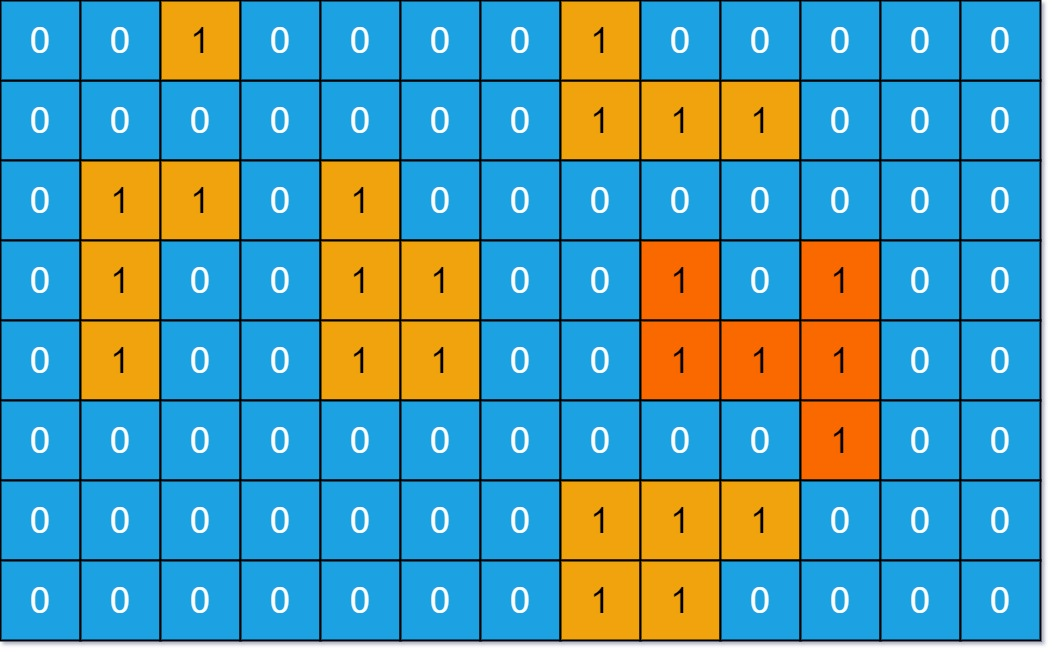

Example 1:


Input: grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,1,1,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,1,1,0,0,1,0,1,0,0],[0,1,0,0,1,1,0,0,1,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,1,1,0,0,0,0]]
Output: 6
Explanation: The answer is not 11, because the island must be connected 4-directionally.


Example 2:

Input: grid = [[0,0,0,0,0,0,0,0]]
Output: 0
 

Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 50
grid[i][j] is either 0 or 1.

In [2]:
class Solution(object):
    def maxAreaOfIsland(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        # get the boundaries of the grid
        m,n=len(grid),len(grid[0])
        # initialize a list 'visited' to keep track of the already visited grid element
        visited=[]
        # initialize max area
        max_area=0
        # traverse the grid using dfs
        def dfs(r,c,connected_path):
            # if (r,c) is valid, value is 1 and not traversed in the current instance 
            if (r,c) not in connected_path and (r>=0 and r<m) and (c>=0 and c<n) and grid[r][c]==1:
                # add (r,c) in the global visited and current connected path for tracking
                connected_path.append((r,c))
                visited.append((r,c))
                # run dfs on the 4-directionally connected elements
                dfs(r+1,c,connected_path)
                dfs(r-1,c,connected_path)
                dfs(r,c+1,connected_path)
                dfs(r,c-1,connected_path)
        # for each element in the grid        
        for r in range(m):
            for c in range(n):
                # if the elemtn is 1 and not visited yet
                if (r,c) not in visited and grid[r][c]==1:
                    # initialize a list to keep track of the connected path of the current instance
                    connected_path=[]
                    # run dfs
                    dfs(r,c,connected_path)
                    # update max area
                    max_area=max(len(connected_path),max_area)
        return max_area              
        
        